<a href="https://colab.research.google.com/github/AlexsonT/Regressao_Linear_Indicium/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [134]:
#Carregando e printando o db.
raw_data = pd.read_csv('wage_train.csv')

print(raw_data.shape)

raw_data.head()

(32560, 16)


,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [135]:
#Explorando os dados.

#Verificando nulos.
raw_data.isnull().sum() 

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
yearly_wage       0
dtype: int64

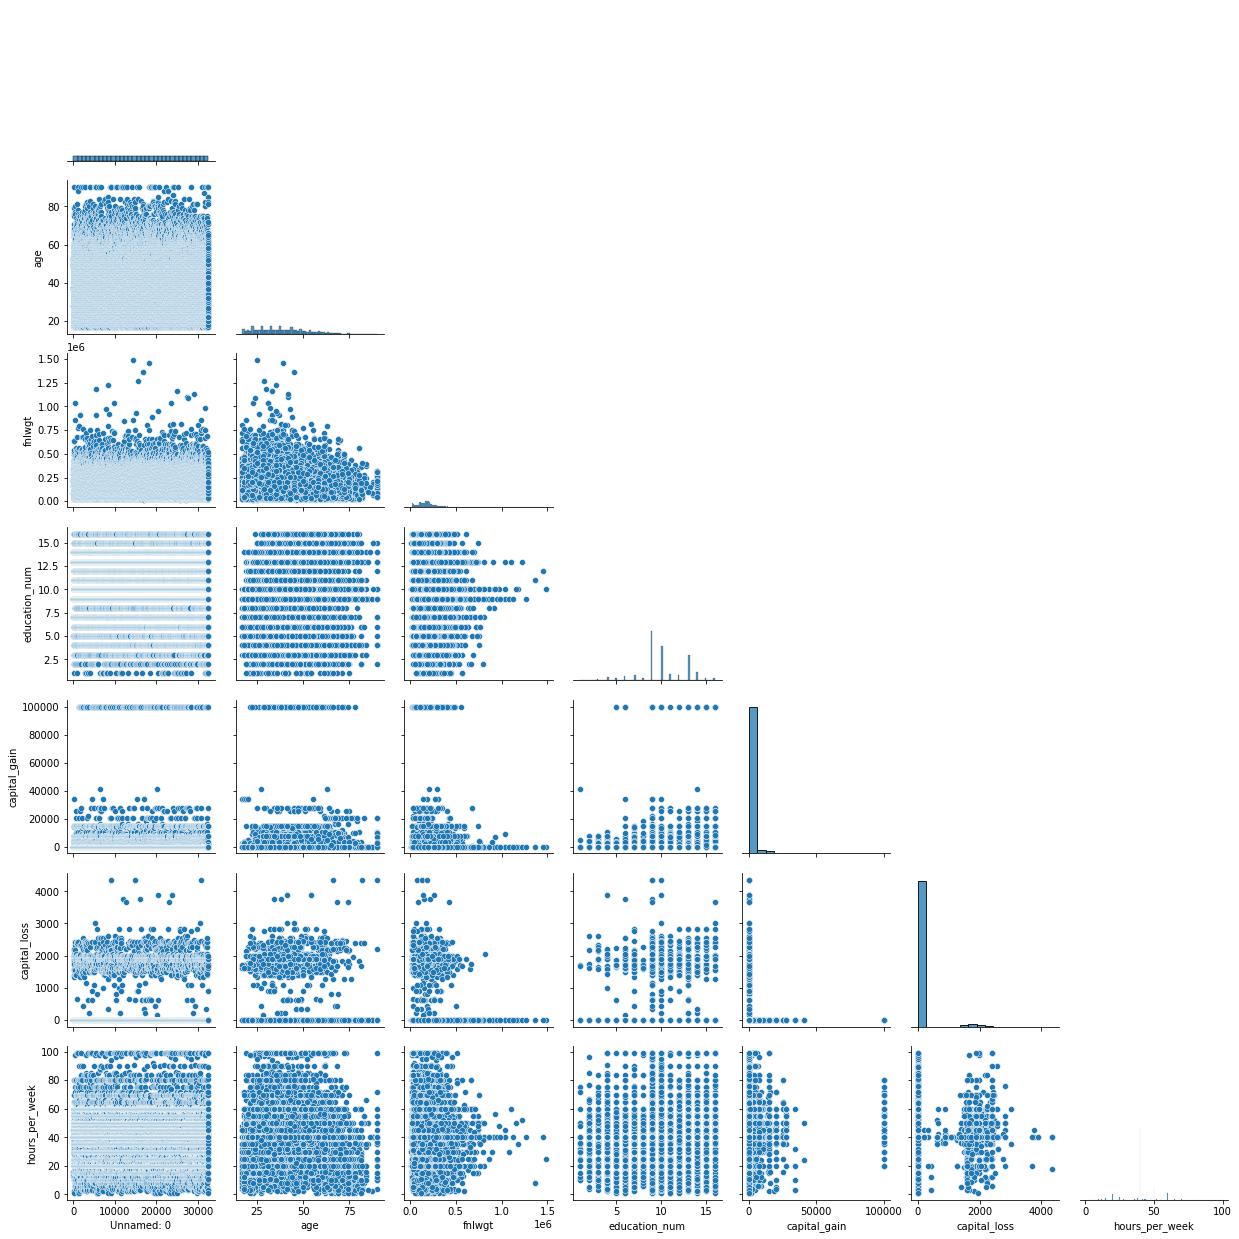

In [126]:
g = sns.pairplot(raw_data, corner = True)

In [136]:
raw_data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'yearly_wage'],
      dtype='object')

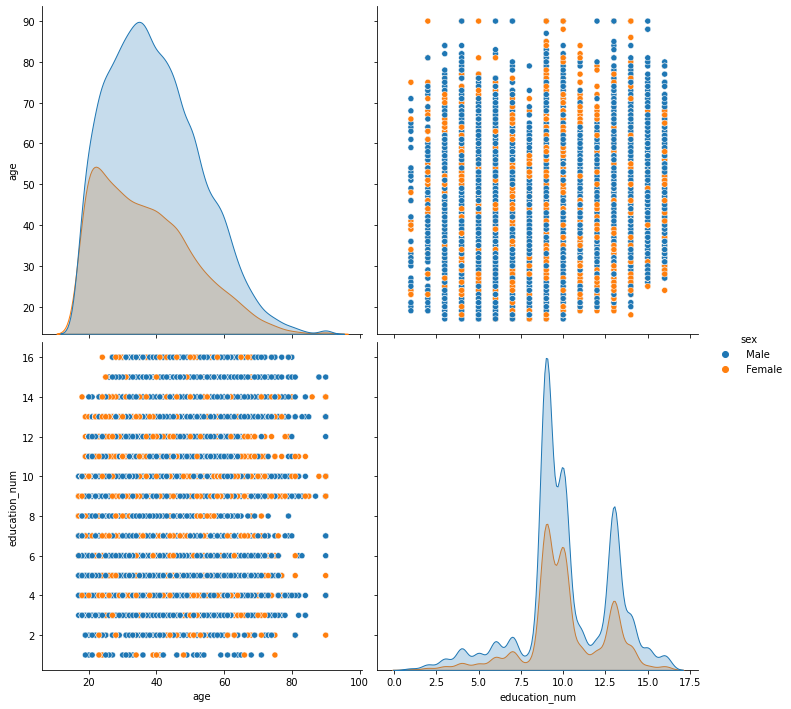

In [81]:
g = sns.pairplot(raw_data, hue = 'sex', height = 5, vars = ['age', 'education_num'])

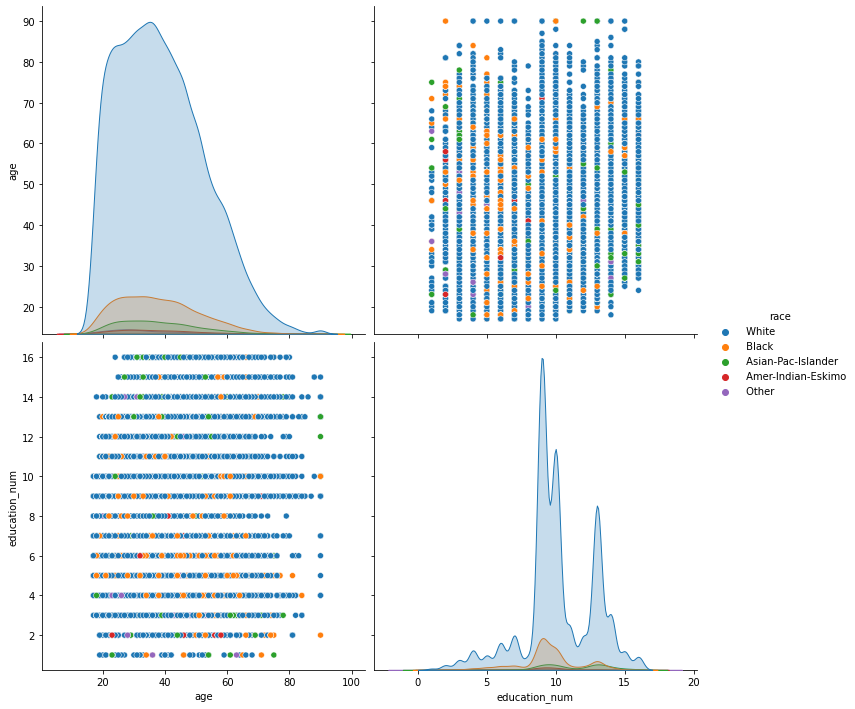

In [82]:
g = sns.pairplot(raw_data, hue = 'race', height = 5, vars = ['age', 'education_num'])

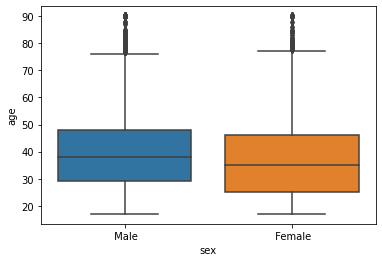

In [97]:
g =  sns.boxplot(x = 'sex', y = 'age', data = raw_data)


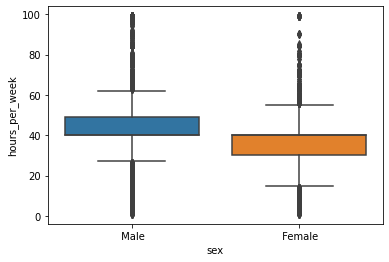

In [98]:
p =  g =  sns.boxplot(x = 'sex', y = 'hours_per_week', data = raw_data)

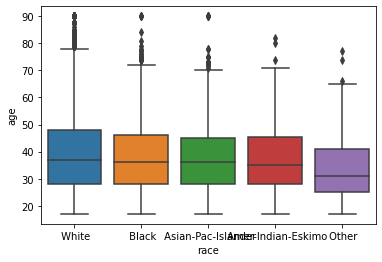

In [92]:
g =  sns.boxplot(x = 'race', y = 'age', data = raw_data)

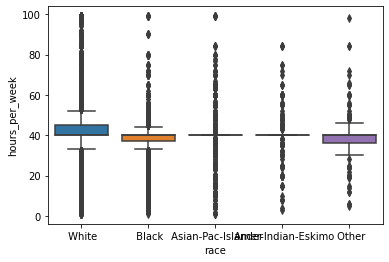

In [100]:
g =  sns.boxplot(x = 'race', y = 'hours_per_week', data = raw_data)

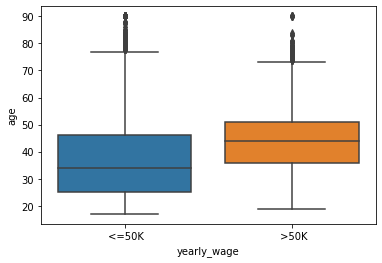

In [93]:
g =  sns.boxplot(x = 'yearly_wage', y = 'age', data = raw_data)

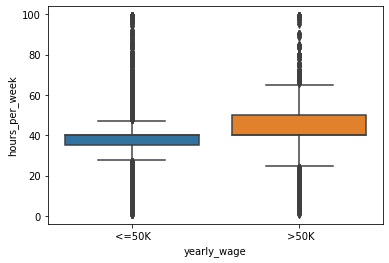

In [101]:
g =  sns.boxplot(x = 'yearly_wage', y = 'hours_per_week', data = raw_data)

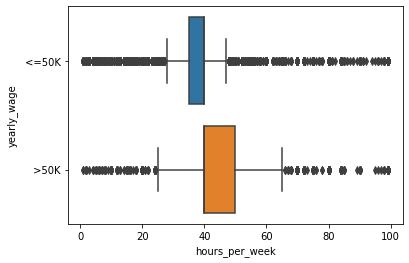

In [107]:
g =  sns.boxplot(x = 'hours_per_week', y = 'yearly_wage', data = raw_data)

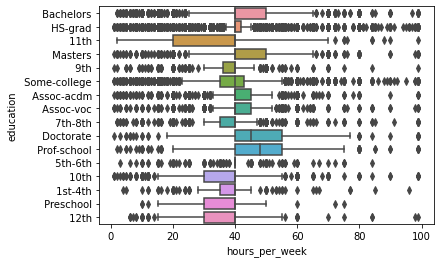

In [108]:
g =  sns.boxplot(x = 'hours_per_week', y = 'education', data = raw_data)

In [137]:
raw_data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'yearly_wage'],
      dtype='object')

In [139]:
raw_data = raw_data[['age', 'education_num', 'occupation', 'sex', 'hours_per_week', 'native_country']]

raw_data.head()

,age,education_num,occupation,sex,hours_per_week,native_country
0,50,13,Exec-managerial,Male,13,United-States
1,38,9,Handlers-cleaners,Male,40,United-States
2,53,7,Handlers-cleaners,Male,40,United-States
3,28,13,Prof-specialty,Female,40,Cuba
4,37,14,Exec-managerial,Female,40,United-States


In [140]:
new_raw_data = pd.get_dummies(raw_data, columns = ['occupation', 'sex', 'native_country'])

In [199]:
new_raw_data.head()

(32560, 62)

In [149]:
#correlação
hm = new_raw_data[['age', 'education_num', 'hours_per_week']].corr()

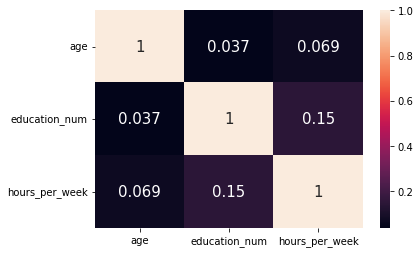

In [157]:
g = sns.heatmap(hm, annot = True, annot_kws={'size':15})

In [205]:
# x = new_raw_data.iloc[:,:]
# y = new_raw_data.iloc[:,:]

# x_dummies = pd.get_dummies(x)

# x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, train_size = 1/5, test_size = 1/5, random_state=15)

In [224]:
#@title
dataset = pd.read_csv('wage_train.csv')
dataset = dataset.dropna()
X = dataset.iloc[:, :-1]
y = dataset.iloc[-1:, -1]


X_train, X_test, y_train, y_test = train_test_split(x_dummies, y, train_size = 1/5, test_size = 1/5, random_state=15)



# Treinando o modelo


lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

# regressor = lm.LinearRegression()
# regressor.fit(X_train, y_train)

# Previsao

y_pred = regressor.predict(X_test)


# Visualizando o treino

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
plt.title('Treino')
plt.show()


# Visualizando o teste


plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
plt.title('Teste')
plt.show()

ValueError: ignored

In [206]:
# lm = LinearRegression(fit_intercept = True)
# lm.fit(x_train, y_train)

# y_pred = lm.predict(x_train) #observar

In [208]:
# np.set_printoptions(precision=1)
# # result = np.concatenate(y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1))

In [217]:
# def undummify(df, prefix_sep="_"):
#     cols2collapse = {
#         item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
#     }
#     series_list = []
#     for col, needs_to_collapse in cols2collapse.items():
#         if needs_to_collapse:
#             undummified = (
#                 df.filter(like=col)
#                 .idxmax(axis=1)
#                 .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
#                 .rename(col)
#             )
#             series_list.append(undummified)
#         else:
#             series_list.append(df[col])
#     undummified_df = pd.concat(series_list, axis=1)
#     return undummified_df

# x_reverse = undummify(x_test)

# x_reverse = x_reverse.reset_index(drop=True)

# y_compare = pd.DataFrame()
# y_compare = y_compare.rename(index=str, columns={0:'y_pred', 1:'y_test'})
# y_compare = y_compare.reset_index(drop=True)

# resultado_final = pd.concat([y_compare, x_reverse], axis=1)

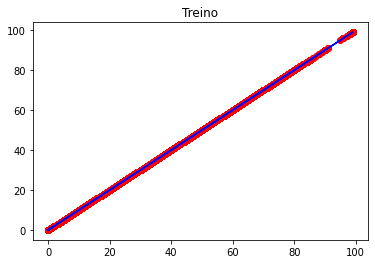

In [215]:
# plt.scatter(x_train, y_train, color = 'red')
# plt.plot(x_train, lm.predict(x_train), color = 'blue')
# plt.title('Treino')
# plt.show()

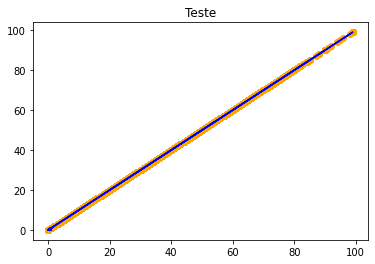

In [216]:
# plt.scatter(x_test, y_test, color = 'orange')
# plt.plot(x_test, lm.predict(x_test), color = 'blue')
# plt.title('Teste')
# plt.show()